# 신경망 모형
### Perceptron
- 하나의 뉴런
- 입력 데이터 혹은 다른 레이어의 출력물을 받아 결과값을 내는 구조
    > input, weights, activation function(활성함수)로 구성.

### Activation Function(활성함수)
- 연속, 비선형, 단조증가, bounded, 접근성의 특성


- 가장 기본적인 Activation function
    - Step function : 0보다 크면 1, 작으면 0
    - Sigmoid function : 이를 통해 뉴런 네트워크가 발전.

- 필요성
    - 은닉 layer를 의미 있게 쌓아주는 역할.
        - 선형의 layer만 쌓인다면, 결국 하나의 선형식이 됨.
    - 출력 값의 range를 결정.

### 신경망 모형의 구조
- Input layer
    - 입력 데이터를 의미
    

- Hidden layer
    - 입력 값:
        - 입력 데이터 혹은 또 다른 Hidden layer의 출력 값
    - 위의 입력값을 받는 perceptron들의 집합.
  

- Output layer
    - 입력 값:
        - 마지막 hidden layer의 출력 값.
    - 최종 출력물을 만들어내는 perceptron들의 집합.

### 역전파 알고리즘
- Output layer에서의 error의 변화량을 앞선 layer들로 전파한다는 개념.
- 미분을 통하여 접근.

### 신경망 모형의 한계점
### 1) Gradient Vanishing
    - Sigmoid 함수의 한계점
        - 미분 함수값 최대값 1/4, x 값이 0에서 멀어질 수록 0에 가까워짐.
            > Backpropagation 시 미분값이 소실되는 현상 발생.
        - 함수값 중심이 0이 아님.
            > Zig-zag update 현상 발생. 계산량 증대.
            
### 1) Gradient Vanishing 해결책
- 1-1) ReLu
    - 계산이 간단함
        - 학습속도가 매우 빠름
    - 0보다 큰 경우 기울기 유지.
        - Gradient vanishing 해결
    - 0보다 작은 경우 기울기가 없는 문제점은 다른 ReLu 계열 함수 이용.

### 2) 중간해 멈춤 현상
    - 최적해에 이르기 전에 중간해에서 멈추는 현상

### 2) 중간해 멈춤 현상 해결책
- 2-1) Pre-training
    - Boltzmann Machine
        - Unsupervised 방식으로 미리 training 시켜 local minima 문제를 해소.
        - 올바른 초기값 선정에 도움. 
        - 서로 인접한 층 사이 서로 예측하여, 예측값이 최소가 되는 Weight를 찾음.
        - 이 값을 초기값으로 선정.
        > 서로 인접한 층 사이에서만 학습하며 X만을 사용하여 weight 학습.
        
- 2-2) ReLU
    - Gradient vanishing 문제가 사라져 중간해 멈춤 현상 완화.

### 3) 과적합 문제
    - Training set에 과하게 최적화 되는 문제.
    - 은닉레이어가 너무 많거나, 노드가 너무 많거나..
        - 일반화 되지 않음.
        
### 3) 과적합 문제 해결
- 3-1) Drop out을 통한 과적합 문제 완화
    - Hidden layer의 node를 임의의 확률에 따라 남김(0.5~1 사이)
    - 계산 속도도 증가

### 은닉층
- 은닉 노드를 지나치게 많이 늘리면 과적합의 문제 발생.
- 복잡한 문제를 푸는 경우, 충분한 은닉 층의 개수 필요
- 다양한 입력 데이터가 있는 경우, 충분한 은닉 노드의 수 필요.

### http://playground.tensorflow.org
- 위 주소에서 레이어 및 노드 추가, 제거를 통해 확인 가능.

# ANN 실습

In [45]:
X = [[0., 0.], [1., 1.]]
y = [[0, 1], [1, 1]]

In [46]:
from sklearn.neural_network import MLPClassifier

- 모델 적합

In [47]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,2), random_state=1)
clf.fit(X,y)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [48]:
clf.predict([[2, 2], [-1, -2]])

array([[1, 1],
       [0, 1]])

In [49]:
clf.coefs_ # hidden layer 각각의 weight

[array([[-0.15011367, -0.62860541, -0.90433213, -3.45938109, -0.63904618],
        [-0.73749132, -1.5947694 , -0.2793927 , -3.28854097,  0.0702225 ]]),
 array([[ 0.30838904, -0.14960207],
        [ 3.14928608, -0.65056811],
        [-0.54615798,  0.54407041],
        [ 4.36386369, -0.33753023],
        [ 0.34792663,  0.68091737]]),
 array([[-3.58233912,  2.68515229],
        [ 0.9049651 , -0.96123048]])]

In [50]:
[coef.shape for coef in clf.coefs_]

[(2, 5), (5, 2), (2, 2)]

### model의 복잡도에 따른 퍼포먼스 비교

In [51]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier

- 설정할 parameter들을 입력. h는 시각화를 얼마나 자세하게 할 것인가에 대한 임의의 값.

In [52]:
h = .02
alphas = np.logspace(-5, 3, 5)
names = ['alpha ' + str(i) for i in alphas]

In [53]:
alphas

array([1.e-05, 1.e-03, 1.e-01, 1.e+01, 1.e+03])

In [54]:
names

['alpha 1e-05', 'alpha 0.001', 'alpha 0.1', 'alpha 10.0', 'alpha 1000.0']

In [55]:
classifiers = []
for i in alphas:
    classifiers.append(MLPClassifier(solver='lbfgs', alpha=i, random_state=1,
                                     hidden_layer_sizes=[100, 100]))
# 알파와 히든 레이어의 갯수를 변경할 수 있다.
# cross_validation을 통해서 !

- 데이터 생성

In [56]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=0, n_clusters_per_class=1)

In [57]:
pd.DataFrame(X).head()

,0,1
0,-0.605416,1.296708
1,1.354900,-0.046877
2,1.780375,1.099858
3,1.436615,0.807641
4,0.721669,1.168160


In [58]:
pd.DataFrame(y).head()

,0
0,1
1,0
2,1
3,1
4,1


In [59]:
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)
# 에러를 추가

- 여러 모양의 추가 데이터셋 생성

In [60]:
datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable]

figure = plt.figure(figsize=(17, 9))
i = 1

<Figure size 1224x648 with 0 Axes>

/Users/hyunsoolee/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/hyunsoolee/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/hyunsoolee/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs fa

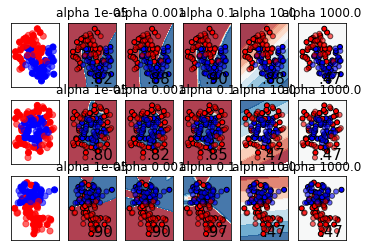

In [61]:
for X, y in datasets:
    # preprocess dataset, split into training and test part
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='black', s=25)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6, edgecolors='black', s=25)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()

- alpha에 대한 선택이 중요하다.
- 더 나아가서, hidden layer의 개수와 hidden layer 내의 노드 갯수도 고려해보아야함.
- 이러한 것은 cross_validation을 통해 찾아보기.